# Домашнее задание 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets

In [2]:
X, y = datasets.make_classification(n_samples=700, 
                                    n_features=4, 
                                    n_informative=2, 
                                    n_redundant=1, 
                                    n_classes=2, 
                                    random_state=42)

In [3]:
def my_tt_split(X, y, cut=0.7, random_state=42):
    np.random.seed(random_state)
    # перемешивание датасета
    shuffle_index = np.random.permutation(X.shape[0])
    X_shuffled, y_shuffled = X[shuffle_index], y[shuffle_index]

    # разбивка на обучающую и тестовую выборки
    index_cut = int(X.shape[0] * cut)

    return X_shuffled[:index_cut], X_shuffled[index_cut:], y_shuffled[:index_cut], y_shuffled[index_cut:]

In [4]:
X_train, X_test, y_train, y_test = my_tt_split(X, y, cut=0.7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((489, 4), (211, 4), (489,), (211,))

## 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [5]:
def sigmoid(X, W):
    return 1 / (1 + np.exp(-np.dot(X, W)))

In [6]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [7]:
def my_calc_logloss1(y, y_pred, autocorrect=1e-8):
    """
    Самый простой и очевидный вариант - заменить 0 и 1 на очень близкие значения
    """
    y_pred[y_pred == 0] =  autocorrect
    y_pred[y_pred == 1] =  1 - autocorrect
    # Как можно это сделать за один проход???
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [8]:
def my_calc_logloss2(y, y_pred, autocorrect=1e-8):
    """
    Второй простой и очевидный вариант - прибавить/вычесть у y_pred очень маленькие значения
    """
    err = - np.mean(y * np.log(y_pred + autocorrect) + (1.0 - y) * np.log(1.0 - y_pred - autocorrect))
    return err

In [9]:
def my_calc_logloss3(y, y_pred):
    """
    Возвращаемся к умножению, чтобы не было логарифмов.
    не оптимальный вариант, но поставленную задачу решает.
    """
    err = - np.prod(y_pred ** (y == 1) * (1 - y_pred) ** (y == 1))
    return err

In [10]:
def my_calc_logloss4(y, y_pred):
    """
    Ещё вариант - заменить все бесконечности. На максимальное значение
    """
    y_pred_log1, y_pred_log2 = np.log(y_pred), np.log(1 - y_pred)
    y_pred_log1[y_pred_log1 == np.inf] = y_pred_log1[y_pred_log1 != np.inf].max()
    y_pred_log2[y_pred_log2 == np.inf] = y_pred_log2[y_pred_log2 != np.inf].max()
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [11]:
def eval_model(X, y, alpha=1e-3, iterations=10000, target_diff=1e-7, random_state=42):
    np.random.seed(random_state)
    
    n = X.shape[0]
    W = np.random.randn(X.shape[1])
    y_pred = sigmoid(X, W)
    errs_hist = []
    
    for i in range(iterations):
        W -= alpha * 2 / n * np.dot((y_pred - y), X)
        y_pred = sigmoid(X, W)
        err = my_calc_logloss1(y, y_pred)
        errs_hist.append(err)
#         if i % (iterations / 10) == 0:
#             print(i, '\t', err)
#         if i > 2 and target_diff > np.abs(err - errs_hist[-2]):
#             return W, errs_hist
#     return W, errs_hist
    return W, err

In [12]:
# W, err_list = eval_model(X, y, alpha=1e-2, iterations=1000, target_diff=1e-9)
# plt.plot(range(len(err_list)), err_list, label='my_calc_logloss1')
# plt.show()

## 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [13]:
def find_min_logloss(X, y, iterations_list, alpha_list):
    result = np.ones(3)
    
    for alpha in alpha_list:
        for iters in iterations_list:
            result = np.vstack((result, [alpha, iters, eval_model(X, y, alpha=alpha, iterations=iters)[1]]))
    best_pair = result[result[:, 2] == result[:, 2].min()]
    return best_pair, result[1:]

In [14]:
iters_list = [10 ** i for i in range(3, 7)] # Как это сделать с помощью np?
alpha_list = [10 ** (-i) for i in range(2, 4)]
b_p, rst = find_min_logloss(X, y, iters_list, alpha_list)
print(b_p)
print(rst)

[[1.00000000e-02 1.00000000e+05 3.83582442e-01]
 [1.00000000e-02 1.00000000e+06 3.83582442e-01]]
[[1.00000000e-02 1.00000000e+03 3.84438917e-01]
 [1.00000000e-02 1.00000000e+04 3.83582442e-01]
 [1.00000000e-02 1.00000000e+05 3.83582442e-01]
 [1.00000000e-02 1.00000000e+06 3.83582442e-01]
 [1.00000000e-03 1.00000000e+03 4.18267427e-01]
 [1.00000000e-03 1.00000000e+04 3.84442034e-01]
 [1.00000000e-03 1.00000000e+05 3.83582442e-01]
 [1.00000000e-03 1.00000000e+06 3.83582442e-01]]


## 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [15]:
def calc_pred_proba(X, W): # зачем? (:
    return sigmoid(X, W)

In [16]:
W_finded = eval_model(X_train, y_train, alpha=1e-3, iterations=int(1e+6))[0]
y_pred_proba = calc_pred_proba(X_train, W_finded)

## 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [17]:
def calc_pred(X, W, cut=0.5):
    y_pred_proba = sigmoid(X, W)
    return np.where(y_pred_proba >= cut, 1, 0)

In [18]:
y_pred = calc_pred(X_train, W_finded)
y_test_pred = calc_pred(X_test, W_finded)

## 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [19]:
def my_accuracy(y, y_pred):
    return (y == y_pred).mean()

def my_precision(y, y_pred):
    TP = y[y == y_pred].sum()
    FP = y[y != y_pred].sum()
    return TP / (TP + FP)
    
def my_recall(y, y_pred):
    TP = y[y == y_pred].sum()
    FN = y[y != y_pred].shape[0] - y[y != y_pred].sum()
    return TP / (TP + FN)

def my_f1(y, y_pred):
    pre = my_precision(y, y_pred)
    rec = my_recall(y, y_pred)
    return 2 * pre * rec / (pre + rec)

In [20]:
print('accuracy train:\t', my_accuracy(y_train, y_pred), '\n'
      'accuracy test:\t', my_accuracy(y_test, y_test_pred),
      '\n','\n'
      'precision train:\t', my_precision(y_train, y_pred), '\n',
     'precision test:\t', my_precision(y_test, y_test_pred),
      '\n', '\n'
      'recall train:\t', my_recall(y_train, y_pred), '\n'
     'reacll test:\t', my_recall(y_test, y_test_pred),
      '\n', '\n'
      'f1 train:\t', my_f1(y_train, y_pred), '\n',
     'f1 test:\t', my_f1(y_test, y_test_pred))

accuracy train:	 0.8404907975460123 
accuracy test:	 0.8199052132701422 
 
precision train:	 0.8461538461538461 
 precision test:	 0.8942307692307693 
 
recall train:	 0.8393574297188755 
reacll test:	 0.775 
 
f1 train:	 0.842741935483871 
 f1 test:	 0.8303571428571429


## 6. Могла ли модель переобучиться? Почему?

Разумеется могла. Это может произойти:
* если в нашей выборке преобладает определённый класс, что может привести к переобучению на этом конкретном классе.
* если при разбиении на `train & test` в `train` попадётся случай, описанный стройкой выше.

## 7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [21]:
def eval_model_L(X, y, alpha=1e-3, iterations=10000, target_diff=1e-7, lambda_=1e-5, L=2, random_state=42):
    np.random.seed(random_state)
    
    n = X.shape[0]
    W = np.random.randn(X.shape[1])
    y_pred = sigmoid(X, W)
    errs_hist = []
    
    for i in range(iterations):
        W -= alpha * 2 / n * np.dot((y_pred - y), X) + lambda_ * np.linalg.norm(W, ord=L)
        y_pred = sigmoid(X, W)
        err = my_calc_logloss1(y, y_pred)
        errs_hist.append(err)
        if i % (iterations / 10) == 0:
            print(i, '\t', err)
        if i > 2 and target_diff > np.abs(err - errs_hist[-2]):
            return W, errs_hist
    return W, errs_hist
#     return W, err

In [22]:
W_l1, errs_l1 = eval_model_L(X, y, lambda_=1e-10, L=1)

0 	 0.44247076413381203
1000 	 0.4182498069355089
2000 	 0.40480874863202304
3000 	 0.39695083412839494
4000 	 0.3921940956677999
5000 	 0.38923783475855245
6000 	 0.38735985703102965
7000 	 0.38614366414107093
8000 	 0.38534227914081953
9000 	 0.3848058782192266


In [23]:
W_l2, errs_l2 = eval_model_L(X, y, lambda_=1e-10, L=2)

0 	 0.44247076414118275
1000 	 0.4182498131081535
2000 	 0.40480875775182257
3000 	 0.3969508437003082
4000 	 0.39219410434161933
5000 	 0.38923784199925365
6000 	 0.3873598627637537
7000 	 0.38614366850833026
8000 	 0.3853422823632312
9000 	 0.3848058805250436


In [24]:
W_, errs_ = eval_model_L(X, y, lambda_=0)

0 	 0.4424707641530993
1000 	 0.4182498228253125
2000 	 0.4048087719348204
3000 	 0.39695085853265516
4000 	 0.3921941178043891
5000 	 0.38923785329195537
6000 	 0.38735987176399417
7000 	 0.38614367541653566
8000 	 0.38534228750054944
9000 	 0.3848058842299183


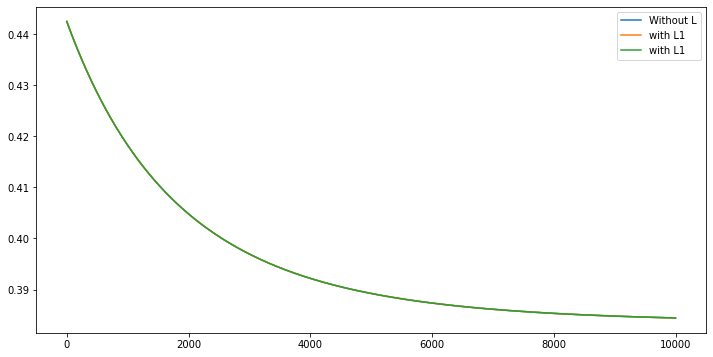

In [25]:
plt.figure(figsize = (12, 6))
plt.plot(range(len(errs_)), errs_, label='Without L')
plt.plot(range(len(errs_l1)), errs_l1, label='with L1')
plt.plot(range(len(errs_l2)), errs_l2, label='with L1')
plt.legend()
plt.show()

В данном случае, разница между не наблюдается.